# Exercício 2 - Perceptron de Rosenblatt - Circles and Squares 

Jean Carlos Mello Xavier Faria - 11259628

Leonardo Alves Amaral Torres   - 11261002

# Inicialização

Nesta primeira etapa vamos incluir todas as bibliotecas que serão necessárias para a realização do código. Logo depois, vamos ler os arquivos de teste e treino e visualizá-los

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("circles_and_squares.csv")

In [3]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Agora vamos modificar o dataframe para uma matriz em numpy. Após isso, vamos visualizar uma imagem de círculo e de quadrado.

In [4]:
data = data_df.to_numpy()
data_df.shape

(1000, 401)

-1.0

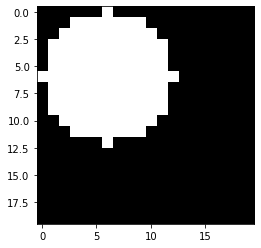

In [5]:
img = data[0, :-1].reshape(20,20)
plt.imshow(img, cmap='gray')
data[0, 400]

1.0


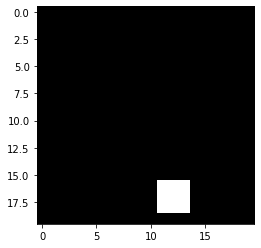

In [6]:
img = data[4, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')
print(data[4, 400])

Como é possível verificar, quando a imagem é um círculo o último valor da linha vale -1 e se for um quadrado vale 1.

# Treinamento do Perceptron de Rosenblatt

Para realizar o treinamento vamos separar os dados em treino e teste. As 800 primeiras linhas vão ser para treino e as 200 restante seram usadas para o teste.

In [7]:
xd = data[:800, :]
xd_test = data[800:, :]

Vamos criar uma função para ser a função não linear $\varphi(\cdot)$

In [8]:
def sgn(v):
    if v < 0:
        signal = -1
    else:
        signal = 1
    return signal

Agora, vamos criar a função que vai ser usada para o treinamento do perceptron de Rosenblatt.

In [9]:
def perceptron(xd, eta, Ne, Nb):
    X = np.ones([len(xd), 1]) #Coluna de 1's
    X = np.column_stack((X, xd)) # Criando a matriz X 
    d = xd[:, 400] #Cria o vetor com as respostas
    X = np.delete(X, len(X[1])-1, 1) #Deleta a coluna com as respostas
    
    #Criando os vetores utilizados no perceptron
    w = np.zeros(len(X[1]))
    v = np.zeros(len(X[:,1]))
    y = np.zeros(len(X[:,1]))
    
    e = np.zeros(len(X[:,1])) #Criando o vetor de erros
    
    Nt = len(X)
    
    for k in range(1, Ne):
        #Misturar a matriz
        np.random.permutation(xd)[:]
        
        for l in range ((Nt//Nb)-1):
            v[l] = X[l].T @ w 
            y[l] = sgn(v[l])
            e[l] = d[l]-y[l]
            w = w + (eta/Nb)*X[l]*e[l]
    return w

Treinando o perceptron com os dados de treino, $\eta=0,001$, $N_e=2000$ e $N_b=1$

In [10]:
w = perceptron(xd, 0.001, 2000, 1) #Define os pesos com os dados de treino

Por fim, vamos preparar a matriz X de teste, calcular com os pesos calculados anteriormente e verificar a acurácia.

In [11]:
X_teste = np.ones([len(xd_test), 1]) #Cria a coluna de 1's da matriz X
X_teste = np.column_stack((X_teste,xd_test)) #Adiciona a matriz de teste para a matriz X
d_teste = xd_test[:, 400] #Coloca no vetor d_teste a última coluna da matriz X com as respostas
X_teste = np.delete(X_teste, len(X_teste[1])-1, 1) #Deleta a última coluna

v = np.zeros(len(X_teste[:, 1])) #Inicializa o vetor v
y = np.zeros(len(X_teste[:, 1])) #Inicializa o vetor y

acerto = 0
v = X_teste @ w #Multiplica a matriz de teste com o vetor de pesos
for l in range (len(X_teste)):
    y[l] = sgn(v[l]) #Usa a função de ativação
    if(d_teste[l] - y[l] == 0): #Verifica se o valor encontrado é igual ao desejado
        acerto += 1

print('Acurácia = {} %'.format(100*(acerto/len(X_teste))))

Acurácia = 70.5 %
